In [7]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### First prepare the json so that the rating is formatted better

In [81]:
with open('completed_perfumes.json', 'r', encoding='utf-8') as f:
    big_dic = json.load(f)


for idx, list_element in enumerate(big_dic):

    detailed_ratings = big_dic[idx]['detailed_ratings']

    for typ, rating_list in detailed_ratings.items():
        buf_dic = {}
        if rating_list is not None:
            for rating_element in rating_list:
                buf_dic[rating_element['r']] = rating_element['v']
            detailed_ratings[typ] = buf_dic
        else:
            detailed_ratings[typ] = None 


    big_dic[idx]['detailed_ratings'] = detailed_ratings

df = pd.json_normalize(big_dic)

**Take a look at an example element**

In [82]:
df[df['name'] == 'Khamrah']

,name,brand,year,collection,flakon_designer,perfumer,top_notes,middle_notes,base_notes,all_notes,url,ratings.Duft.rating,ratings.Duft.number_of_ratings,ratings.Haltbarkeit.rating,ratings.Haltbarkeit.number_of_ratings,ratings.Sillage.rating,ratings.Sillage.number_of_ratings,ratings.Flakon.rating,ratings.Flakon.number_of_ratings,ratings.Preis-Leistungs-Verhältnis.rating,ratings.Preis-Leistungs-Verhältnis.number_of_ratings,detailed_ratings.scent.0,detailed_ratings.scent.1,detailed_ratings.scent.2,detailed_ratings.scent.3,detailed_ratings.scent.4,detailed_ratings.scent.5,detailed_ratings.scent.6,detailed_ratings.scent.7,detailed_ratings.scent.8,detailed_ratings.scent.9,detailed_ratings.scent.10,detailed_ratings.durability.0,detailed_ratings.durability.1,detailed_ratings.durability.2,detailed_ratings.durability.3,detailed_ratings.durability.4,detailed_ratings.durability.5,detailed_ratings.durability.6,detailed_ratings.durability.7,detailed_ratings.durability.8,detailed_ratings.durability.9,detailed_ratings.durability.10,detailed_ratings.sillage.0,detailed_ratings.sillage.1,detailed_ratings.sillage.2,detailed_ratings.sillage.3,detailed_ratings.sillage.4,detailed_ratings.sillage.5,detailed_ratings.sillage.6,detailed_ratings.sillage.7,detailed_ratings.sillage.8,detailed_ratings.sillage.9,detailed_ratings.sillage.10,detailed_ratings.bottle.0,detailed_ratings.bottle.1,detailed_ratings.bottle.2,detailed_ratings.bottle.3,detailed_ratings.bottle.4,detailed_ratings.bottle.5,detailed_ratings.bottle.6,detailed_ratings.bottle.7,detailed_ratings.bottle.8,detailed_ratings.bottle.9,detailed_ratings.bottle.10,detailed_ratings.pricing.0,detailed_ratings.pricing.1,detailed_ratings.pricing.2,detailed_ratings.pricing.3,detailed_ratings.pricing.4,detailed_ratings.pricing.5,detailed_ratings.pricing.6,detailed_ratings.pricing.7,detailed_ratings.pricing.8,detailed_ratings.pricing.9,detailed_ratings.pricing.10,scent_types.Zitrus,scent_types.Würzig,scent_types.Grün,scent_types.Fruchtig,scent_types.Frisch,scent_types.Blumig,scent_types.Herren,scent_types.Damen,scent_types.Klassisch,scent_types.Modern,scent_types.Winter,scent_types.Herbst,scent_types.Sommer,scent_types.Frühling,scent_types.Täglich,scent_types.Sport,scent_types.Freizeit,scent_types.Ausgehen,scent_types.Arbeit,scent_types.Abend,detailed_ratings.pricing,scent_types.Synthetisch,scent_types.Süß,scent_types.Holzig,scent_types.Aquatisch,scent_types.Gourmand,scent_types.Pudrig,scent_types.Orientalisch,scent_types.Cremig,scent_types.Ledrig,scent_types.Harzig,scent_types.Rauchig,scent_types.Erdig,scent_types.Animalisch,scent_types.Fougère,scent_types.Chypre,detailed_ratings.durability,detailed_ratings.sillage,detailed_ratings.bottle,detailed_ratings.scent
992,Khamrah,Lattafa / لطافة,2022.0,None,None,None,"[Zimt, Muskat, Bergamotte]","[Dattel, Praline, Mahonial®, Tuberose]","[geröstete Tonkabohne, Vanille, Amberholz, Sia...",None,https://www.parfumo.de/Parfums/Lattafa/khamrah,8.1,2818.0,8.5,2681.0,8.2,2666.0,8.2,2628.0,9.3,2587.0,8.0,22.0,23.0,39.0,46.0,78.0,145.0,459.0,907.0,725.0,366.0,2.0,1.0,2.0,6.0,11.0,19.0,63.0,245.0,998.0,854.0,480.0,2.0,2.0,2.0,2.0,15.0,28.0,87.0,382.0,1144.0,655.0,347.0,3.0,7.0,5.0,16.0,27.0,62.0,177.0,350.0,799.0,608.0,574.0,2.0,4.0,2.0,6.0,11.0,23.0,40.0,86.0,300.0,583.0,1530.0,NaN,16.18,NaN,NaN,NaN,NaN,54.96,45.04,40.0,60.0,49.43,41.89,NaN,8.67,9.22,NaN,17.77,32.38,5.23,35.39,NaN,NaN,26.65,5.37,NaN,24.25,NaN,17.51,10.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Remove the arabic letters to avoid formatting issues**

In [83]:
# strip of arabic name to have it cleaner
df['brand'] = df['brand'].str.replace(r'[^a-zA-Z0-9\s]', '', regex=True).str.strip()
df[df['name'] == 'Khamrah']

,name,brand,year,collection,flakon_designer,perfumer,top_notes,middle_notes,base_notes,all_notes,url,ratings.Duft.rating,ratings.Duft.number_of_ratings,ratings.Haltbarkeit.rating,ratings.Haltbarkeit.number_of_ratings,ratings.Sillage.rating,ratings.Sillage.number_of_ratings,ratings.Flakon.rating,ratings.Flakon.number_of_ratings,ratings.Preis-Leistungs-Verhältnis.rating,ratings.Preis-Leistungs-Verhältnis.number_of_ratings,detailed_ratings.scent.0,detailed_ratings.scent.1,detailed_ratings.scent.2,detailed_ratings.scent.3,detailed_ratings.scent.4,detailed_ratings.scent.5,detailed_ratings.scent.6,detailed_ratings.scent.7,detailed_ratings.scent.8,detailed_ratings.scent.9,detailed_ratings.scent.10,detailed_ratings.durability.0,detailed_ratings.durability.1,detailed_ratings.durability.2,detailed_ratings.durability.3,detailed_ratings.durability.4,detailed_ratings.durability.5,detailed_ratings.durability.6,detailed_ratings.durability.7,detailed_ratings.durability.8,detailed_ratings.durability.9,detailed_ratings.durability.10,detailed_ratings.sillage.0,detailed_ratings.sillage.1,detailed_ratings.sillage.2,detailed_ratings.sillage.3,detailed_ratings.sillage.4,detailed_ratings.sillage.5,detailed_ratings.sillage.6,detailed_ratings.sillage.7,detailed_ratings.sillage.8,detailed_ratings.sillage.9,detailed_ratings.sillage.10,detailed_ratings.bottle.0,detailed_ratings.bottle.1,detailed_ratings.bottle.2,detailed_ratings.bottle.3,detailed_ratings.bottle.4,detailed_ratings.bottle.5,detailed_ratings.bottle.6,detailed_ratings.bottle.7,detailed_ratings.bottle.8,detailed_ratings.bottle.9,detailed_ratings.bottle.10,detailed_ratings.pricing.0,detailed_ratings.pricing.1,detailed_ratings.pricing.2,detailed_ratings.pricing.3,detailed_ratings.pricing.4,detailed_ratings.pricing.5,detailed_ratings.pricing.6,detailed_ratings.pricing.7,detailed_ratings.pricing.8,detailed_ratings.pricing.9,detailed_ratings.pricing.10,scent_types.Zitrus,scent_types.Würzig,scent_types.Grün,scent_types.Fruchtig,scent_types.Frisch,scent_types.Blumig,scent_types.Herren,scent_types.Damen,scent_types.Klassisch,scent_types.Modern,scent_types.Winter,scent_types.Herbst,scent_types.Sommer,scent_types.Frühling,scent_types.Täglich,scent_types.Sport,scent_types.Freizeit,scent_types.Ausgehen,scent_types.Arbeit,scent_types.Abend,detailed_ratings.pricing,scent_types.Synthetisch,scent_types.Süß,scent_types.Holzig,scent_types.Aquatisch,scent_types.Gourmand,scent_types.Pudrig,scent_types.Orientalisch,scent_types.Cremig,scent_types.Ledrig,scent_types.Harzig,scent_types.Rauchig,scent_types.Erdig,scent_types.Animalisch,scent_types.Fougère,scent_types.Chypre,detailed_ratings.durability,detailed_ratings.sillage,detailed_ratings.bottle,detailed_ratings.scent
992,Khamrah,Lattafa,2022.0,None,None,None,"[Zimt, Muskat, Bergamotte]","[Dattel, Praline, Mahonial®, Tuberose]","[geröstete Tonkabohne, Vanille, Amberholz, Sia...",None,https://www.parfumo.de/Parfums/Lattafa/khamrah,8.1,2818.0,8.5,2681.0,8.2,2666.0,8.2,2628.0,9.3,2587.0,8.0,22.0,23.0,39.0,46.0,78.0,145.0,459.0,907.0,725.0,366.0,2.0,1.0,2.0,6.0,11.0,19.0,63.0,245.0,998.0,854.0,480.0,2.0,2.0,2.0,2.0,15.0,28.0,87.0,382.0,1144.0,655.0,347.0,3.0,7.0,5.0,16.0,27.0,62.0,177.0,350.0,799.0,608.0,574.0,2.0,4.0,2.0,6.0,11.0,23.0,40.0,86.0,300.0,583.0,1530.0,NaN,16.18,NaN,NaN,NaN,NaN,54.96,45.04,40.0,60.0,49.43,41.89,NaN,8.67,9.22,NaN,17.77,32.38,5.23,35.39,NaN,NaN,26.65,5.37,NaN,24.25,NaN,17.51,10.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Set the nonexisting scenttypes to 0**

In [84]:
df.loc[:, df.filter(like='scent_types.').columns] = df.filter(like='scent_types.').fillna(0)

**remove some unnecessary parts in the column names**

In [86]:
df = df.drop(df.filter(regex='^scent_strength').columns, axis=1)

df.columns = df.columns.str.replace(r'^[^.]+\.', '', regex=True)

pd.set_option('display.max_columns', None)  # Show all columns
print(df.columns)

Index(['name', 'brand', 'year', 'collection', 'flakon_designer', 'perfumer',
       'top_notes', 'middle_notes', 'base_notes', 'all_notes',
       ...
       'Harzig', 'Rauchig', 'Erdig', 'Animalisch', 'Fougère', 'Chypre',
       'durability', 'sillage', 'bottle', 'scent'],
      dtype='object', length=116)


In [105]:
df[(df['top_notes'].apply(lambda x: 'Meeresbrise' in x if x is not None else False)) |
   (df['middle_notes'].apply(lambda x: 'Meeresbrise' in x if x is not None else False)) |
   (df['base_notes'].apply(lambda x: 'Meeresbrise' in x if x is not None else False)) |
   (df['all_notes'].apply(lambda x: 'Meeresbrise' in x if x is not None else False))] \
   [df['Duft.rating'] > 7.5].head()

/var/folders/lq/blpghcxd0b9cm2tsrvlqq9g40000gn/T/ipykernel_35418/1894747635.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[(df['top_notes'].apply(lambda x: 'Meeresbrise' in x if x is not None else False)) |


,name,brand,year,collection,flakon_designer,perfumer,top_notes,middle_notes,base_notes,all_notes,url,Duft.rating,Duft.number_of_ratings,Haltbarkeit.rating,Haltbarkeit.number_of_ratings,Sillage.rating,Sillage.number_of_ratings,Flakon.rating,Flakon.number_of_ratings,Preis-Leistungs-Verhältnis.rating,Preis-Leistungs-Verhältnis.number_of_ratings,scent.0,scent.1,scent.2,scent.3,scent.4,scent.5,scent.6,scent.7,scent.8,scent.9,scent.10,durability.0,durability.1,durability.2,durability.3,durability.4,durability.5,durability.6,durability.7,durability.8,durability.9,durability.10,sillage.0,sillage.1,sillage.2,sillage.3,sillage.4,sillage.5,sillage.6,sillage.7,sillage.8,sillage.9,sillage.10,bottle.0,bottle.1,bottle.2,bottle.3,bottle.4,bottle.5,bottle.6,bottle.7,bottle.8,bottle.9,bottle.10,pricing.0,pricing.1,pricing.2,pricing.3,pricing.4,pricing.5,pricing.6,pricing.7,pricing.8,pricing.9,pricing.10,Zitrus,Würzig,Grün,Fruchtig,Frisch,Blumig,Herren,Damen,Klassisch,Modern,Winter,Herbst,Sommer,Frühling,Täglich,Sport,Freizeit,Ausgehen,Arbeit,Abend,pricing,Synthetisch,Süß,Holzig,Aquatisch,Gourmand,Pudrig,Orientalisch,Cremig,Ledrig,Harzig,Rauchig,Erdig,Animalisch,Fougère,Chypre,durability,sillage,bottle,scent
108,Costa Azzurra Acqua,Tom Ford,2019.0,None,None,Yann Vasnier,"[Meeresbrise, Wacholder, Zypresse, Myrte]","[Kiefernnadel, Kiefernzapfen, Zitrone]","[Mastixharz, Zistrose Absolue]",None,https://www.parfumo.de/Parfums/Tom_Ford/Costa_...,7.6,218.0,6.5,200.0,6.2,201.0,8.4,228.0,6.1,107.0,1.0,1.0,0.0,1.0,2.0,7.0,31.0,77.0,58.0,34.0,6.0,1.0,0.0,0.0,2.0,3.0,24.0,72.0,74.0,17.0,4.0,3.0,1.0,1.0,0.0,1.0,5.0,27.0,90.0,60.0,12.0,2.0,2.0,0.0,0.0,0.0,0.0,1.0,3.0,7.0,30.0,85.0,55.0,47.0,0.0,0.0,3.0,4.0,6.0,18.0,35.0,26.0,9.0,3.0,3.0,18.73,11.61,6.74,0.0,22.10,0.00,71.28,28.72,40.91,59.09,5.59,11.89,46.15,36.36,22.75,17.65,23.92,8.24,19.61,7.84,NaN,5.62,0.00,11.99,23.22,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
237,White Tea Elizabeth Arden 2022 Eau de Parfum,Elizabeth Arden,2022.0,None,None,Rodrigo Flores-Roux,"[italienische Mandarine, Muskatellersalbei, Me...","[weißer Tee, Jasmin, Mate Absolue, Rosenwasser]","[Amberholz, Moschus, venezolanische Tonkabohne]",None,https://www.parfumo.de/Parfums/Elizabeth_Arden...,8.1,60.0,7.0,55.0,6.3,52.0,7.8,64.0,8.6,50.0,0.0,0.0,0.0,0.0,1.0,1.0,6.0,13.0,18.0,15.0,6.0,0.0,0.0,0.0,0.0,2.0,4.0,10.0,19.0,14.0,6.0,0.0,0.0,0.0,0.0,2.0,2.0,9.0,14.0,17.0,7.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,5.0,12.0,25.0,12.0,6.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,5.0,10.0,14.0,16.0,8.14,0.00,11.63,0.0,26.74,23.26,21.21,78.79,57.69,42.31,14.29,22.62,32.14,30.95,27.84,10.31,25.77,4.12,23.71,8.25,NaN,0.00,0.00,9.30,0.00,0.0,6.98,0.0,13.95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
591,Naki,pernoire,2023.0,Anima Collection,None,Andreas Wilhelm,"[Pfirsich, Aldehyde, Mandelblüte, Passionsfrucht]","[Feigenblatt, weiße Blüten, Sandelholz]","[weißer Moschus, Meeresbrise, Osmanthus, Vanille]",None,https://www.parfumo.de/Parfums/pernoire/naki,7.6,168.0,7.8,143.0,7.4,144.0,8.1,135.0,6.6,115.0,0.0,0.0,2.0,3.0,2.0,6.0,26.0,45.0,50.0,20.0,14.0,0.0,0.0,0.0,1.0,1.0,5.0,4.0,30.0,70.0,24.0,8.0,0.0,0.0,1.0,0.0,2.0,5.0,9.0,56.0,54.0,13.0,4.0,0.0,0.0,0.0,1.0,0.0,3.0,5.0,23.0,66.0,19.0,18.0,0.0,2.0,1.0,1.0,6.0,13.0,22.0,38.0,24.0,4.0,4.0,0.00,0.00,7.03,22.7,21.62,14.05,41.79,58.21,23.40,76.60,6.60,13.21,38.68,41.51,18.75,5.56,26.39,16.67,18.75,13.89,NaN,8.11,15.68,0.00,0.00,0.0,0.00,0.0,10.81,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1416,L'Eau d'Issey pour Homme by Kevin Lucbert,Issey Miyake,2022.0,None,Flakondesign Illustration: Kevin Lucbert,Dora Baghriche-Arnaud,None,None,None,"[Zitrone, Eukalyptus, Kiefer, Meeresbrise, Zed...",https://www.parfumo.de/Parfums/Issey_Miyake/l-...,7.9,46.0,6.7,43.0,6.5,43.0,7.3,45.0,8.4,34.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0,10.0,18.0,7.0,4.0,0.0,0.0,0.0,0.0,1.0,5.0,11.0,18.0,7.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,3.0,17.0,16.0,4.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,10.0,10.0,11.0,8.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,11.0,11.0,6.

In [ ]:
for col in df.columns:
    print(col)


name
brand
year
collection
flakon_designer
perfumer
top_notes
middle_notes
base_notes
all_notes
url
Duft.rating
Duft.number_of_ratings
Haltbarkeit.rating
Haltbarkeit.number_of_ratings
Sillage.rating
Sillage.number_of_ratings
Flakon.rating
Flakon.number_of_ratings
Preis-Leistungs-Verhältnis.rating
Preis-Leistungs-Verhältnis.number_of_ratings
scent.0
scent.1
scent.2
scent.3
scent.4
scent.5
scent.6
scent.7
scent.8
scent.9
scent.10
durability.0
durability.1
durability.2
durability.3
durability.4
durability.5
durability.6
durability.7
durability.8
durability.9
durability.10
sillage.0
sillage.1
sillage.2
sillage.3
sillage.4
sillage.5
sillage.6
sillage.7
sillage.8
sillage.9
sillage.10
bottle.0
bottle.1
bottle.2
bottle.3
bottle.4
bottle.5
bottle.6
bottle.7
bottle.8
bottle.9
bottle.10
pricing.0
pricing.1
pricing.2
pricing.3
pricing.4
pricing.5
pricing.6
pricing.7
pricing.8
pricing.9
pricing.10
Zitrus
Würzig
Grün
Fruchtig
Frisch
Blumig
Herren
Damen
Klassisch
Modern
Winter
Herbst
Sommer
Frühling


**Save to excel**

In [88]:
df.to_excel("perfumes.xlsx", sheet_name="Sheet1", index=False)


In [95]:
KRITERIUM = 'Zitrus'
ANZ_DUFT_RATINGS = 100
crit =  KRITERIUM 
duft = 'Duft' + '.rating'
duft_ratings = 'Duft' + '.number_of_ratings'
haltbarkeit = 'Haltbarkeit' + '.rating'
sillage = 'Sillage' + '.rating'

filtered_df = df[
    (df[duft] > 7.5) & 
    (df[haltbarkeit] > 7.5) & 
    (df[sillage] > 7.5) & 
    (df[duft_ratings] > ANZ_DUFT_RATINGS)
    ].sort_values(by=crit, ascending=False)

# Select specific columns and show the first 10 rows
result = filtered_df[['name', 'brand', crit, duft, haltbarkeit, sillage]].head(20)

# Print result
pd.set_option('display.width', 250)  # Set the max width (adjust as needed)
pd.set_option('display.max_columns', None)  # Ensure all columns are displayed
print(result)

                                             name              brand  Zitrus  Duft.rating  Haltbarkeit.rating  Sillage.rating
938                                   Imagination      Louis Vuitton   27.26          8.9                 7.8             7.6
2291                                    Bergamask        Orto Parisi   26.90          7.8                 8.9             8.4
2980                                       Ginger  Widian  AJ Arabia   25.00          9.0                 8.1             7.6
169                                        Nero70            XerJoff   23.64          8.0                 8.0             7.6
4630                                          NaN                NaN   23.04          8.3                 8.5             8.2
1657                                       Search            Amouage   22.96          7.8                 8.1             7.7
3407     Oligarch Roja Parfums 2016 Eau de Parfum       Roja Parfums   22.93          8.7                 8.0         

---

#### Let's test out some plots

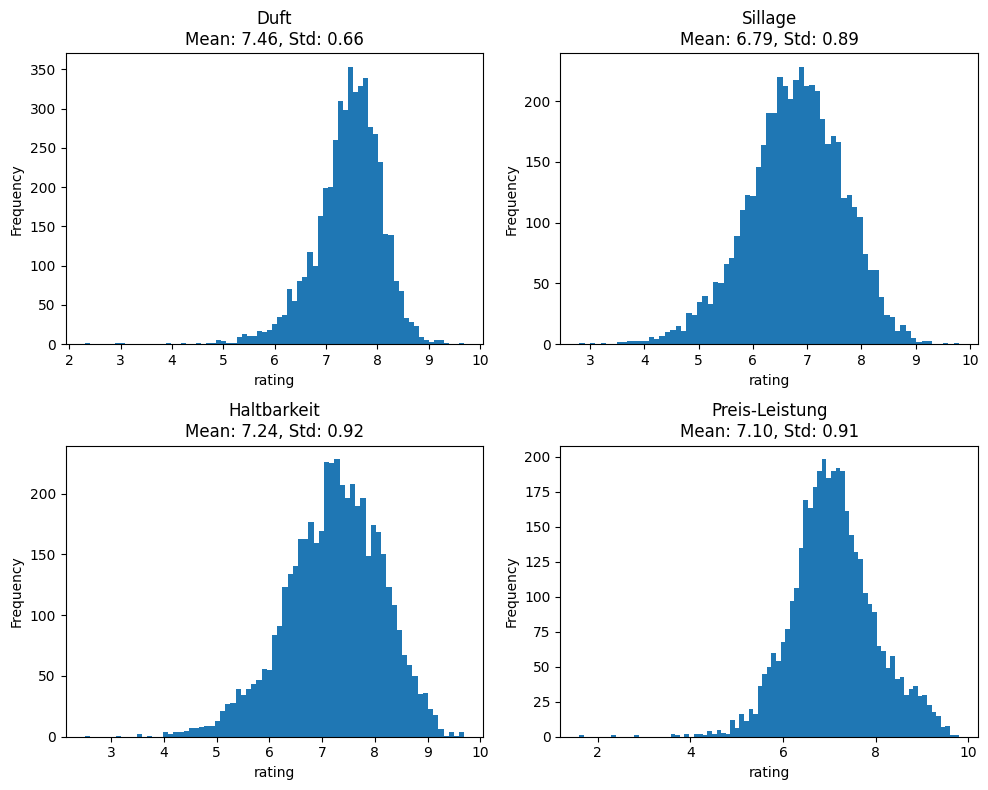

In [33]:
col_data = {
    "Duft": np.array(df['Duft.rating'].dropna()),
    "Sillage": np.array(df['Sillage.rating'].dropna()),
    "Haltbarkeit": np.array(df['Haltbarkeit.rating'].dropna()),
    "Preis-Leistung": np.array(df['Preis-Leistungs-Verhältnis.rating'].dropna())
}
scent_hist = np.array(df['Duft.rating'].dropna())
scent_mean = scent_hist.mean()
scent_std = scent_hist.std()

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Flatten the axes array to make indexing easier
axes = axes.flatten()

def get_bins(array):
    span = array.max() - array.min()
    bins = int(span*10) + 1
    return bins

# Plot the histograms in each of the 4 subplots
# Iterate over the dictionary and plot different entries
for i, (title, data) in enumerate(col_data.items()):
    ax = axes[i]
    ax.hist(data, bins=get_bins(data)) #have as many bins as there are different ratings
    ax.set_title(f'{title}\nMean: {data.mean():.2f}, Std: {data.std():.2f}')
    ax.set_xlabel(f'rating')
    ax.set_ylabel('Frequency')
# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

#### Let's take a look at the performance of some perfumers

In [36]:
filtered_scores = df.loc[df['perfumer'] == 'Anne Flipo', 'Duft.rating']
print(len(filtered_scores))

54


##### Brands

Brand Counts: {'Guerlain': 134, 'Zara': 124, 'Giorgio Armani': 93, 'Dior': 69, 'Tom Ford': 67, 'XerJoff': 59, 'Yves Saint Laurent': 58, 'Amouage': 54, 'Jil Sander': 51, 'Mugler': 50, 'Lancme': 50, 'Hugo Boss': 50, 'Rabanne': 49, 'Dolce  Gabbana': 48, 'Calvin Klein': 47, 'Jean Paul Gaultier': 43, 'Givenchy': 41, 'Issey Miyake': 40, 'Bvlgari': 39, 'Yves Rocher': 38, 'Penhaligons': 38, 'Herms': 37, 'Gucci': 37, 'Roja Parfums': 36, 'Jo Malone': 36, 'Kilian': 35, 'Prada': 32, 'Kenzo': 30, 'Montale': 29, 'Narciso Rodriguez': 28, 'Maison Francis Kurkdjian': 28, 'Davidoff': 28, 'Chanel': 27, 'Louis Vuitton': 27, 'Acqua di Parma': 27, 'Valentino': 27, 'Areej Le Dor': 26, 'Burberry': 25, 'M Micallef': 25, 'Azzaro': 24, 'Zoologist': 24, 'Parfums de Marly': 24, 'Chlo': 23, '4711': 23, 'Carolina Herrera': 22, 'Aaron Terence Hughes': 22, 'Cartier': 21, 'Rammstein': 20, 'Zadig  Voltaire': 20, 'Byredo': 20, 'Rituals': 20, 'Atelier Cologne': 19, 'Atkinsons': 19, 'Bottega Veneta': 19, 'LOccitane en Prov

Text(0.5, 1.0, 'Perfume Count by Brand')

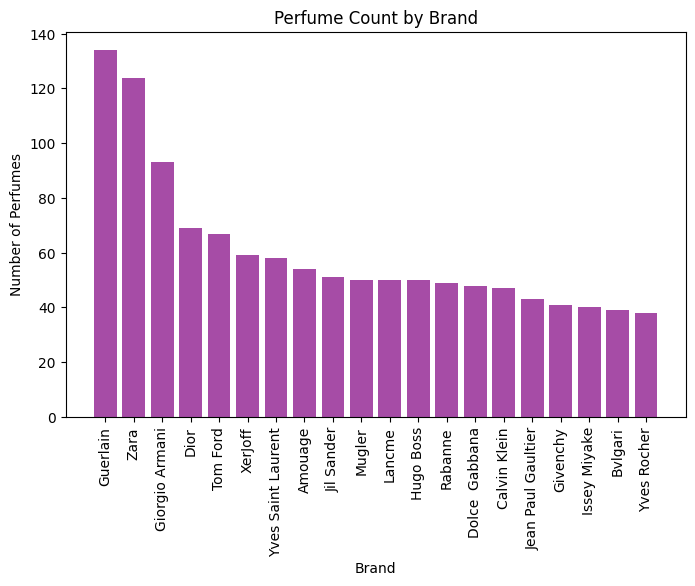

In [59]:
brand_counts = df['brand'].value_counts().to_dict()
# Get the top 4 perfumers
top_4_brands = dict(sorted(brand_counts.items(), key=lambda x: x[1], reverse=True)[:4])

print("Brand Counts:", brand_counts)
print("Top 4 Brands:", top_4_brands)

brand = list(brand_counts.keys())
b_counts = list(brand_counts.values())

top = 20
# Create the bar chart
plt.figure(figsize=(8, 5))
plt.bar(brand[:top], b_counts[:top], color='purple', alpha=0.7)

# Labels and title
plt.xlabel('Brand')
plt.ylabel('Number of Perfumes')
plt.xticks(rotation=90)

plt.title('Perfume Count by Brand')

In [62]:
df.loc[df['brand'] == 'Xerjoff', 'Duft.rating'].dropna()

Series([], Name: Duft.rating, dtype: float64)

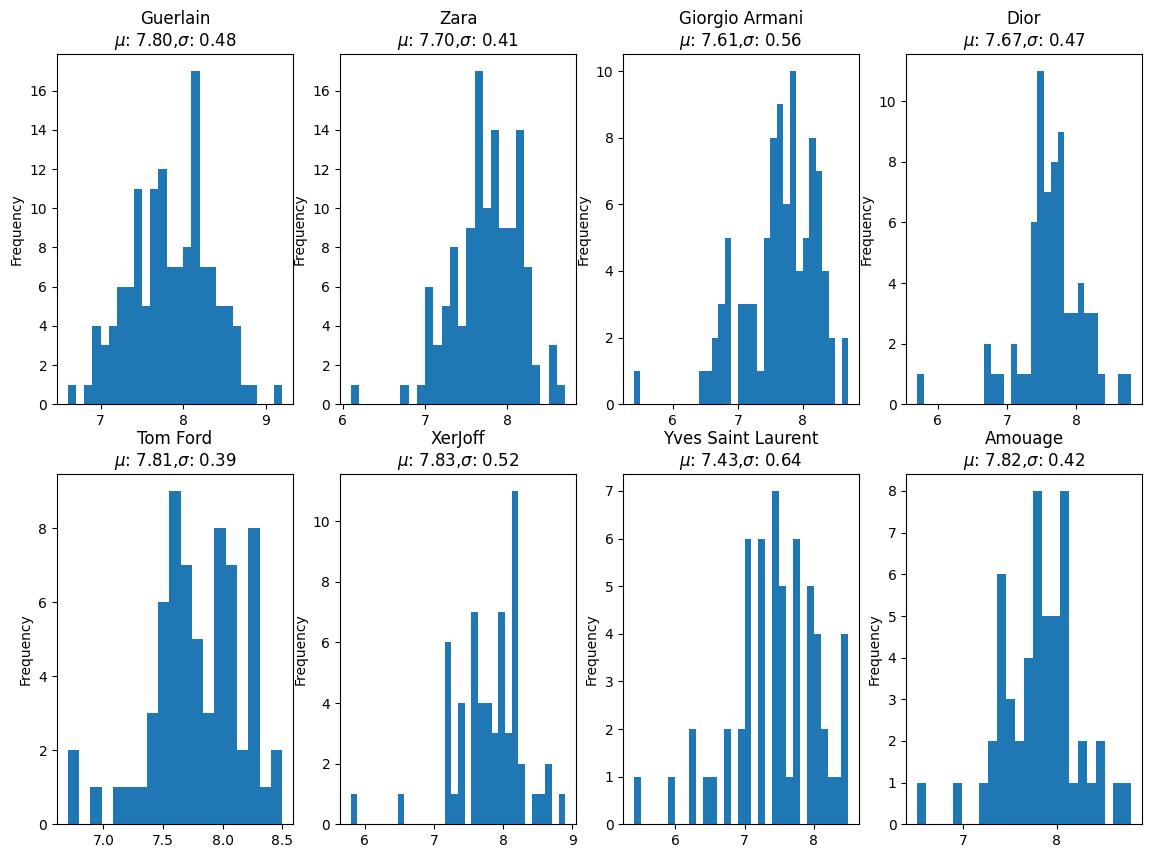

In [63]:
names = ['Guerlain', 'Zara', 'Giorgio Armani', 'Dior', 'Tom Ford', 'XerJoff', 'Yves Saint Laurent', 'Amouage']
col_data = {
    names[0]: np.array(df.loc[df['brand'] == names[0], 'Duft.rating'].dropna()),
    names[1]: np.array(df.loc[df['brand'] == names[1], 'Duft.rating'].dropna()),
    names[2]: np.array(df.loc[df['brand'] == names[2], 'Duft.rating'].dropna()),
    names[3]: np.array(df.loc[df['brand'] == names[3], 'Duft.rating'].dropna()),
    names[4]: np.array(df.loc[df['brand'] == names[4], 'Duft.rating'].dropna()),
    names[5]: np.array(df.loc[df['brand'] == names[5], 'Duft.rating'].dropna()),
    names[6]: np.array(df.loc[df['brand'] == names[6], 'Duft.rating'].dropna()),
    names[7]: np.array(df.loc[df['brand'] == names[7], 'Duft.rating'].dropna()),
}
scent_hist = np.array(df['Duft.rating'].dropna())
scent_mean = scent_hist.mean()
scent_std = scent_hist.std()

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 4, figsize=(14, 10))

# Flatten the axes array to make indexing easier
axes = axes.flatten()

def get_bins(array):
    span = array.max() - array.min()
    bins = int(span*10) + 1
    return bins

# Plot the histograms in each of the 4 subplots
# Iterate over the dictionary and plot different entries
for i, (title, data) in enumerate(col_data.items()):
    ax = axes[i]
    ax.hist(data, bins=get_bins(data)) #have as many bins as there are different ratings
    ax.set_title(f'{title}\n' + r'$\mu$' + f': {data.mean():.2f},' r'$\sigma$' + f': {data.std():.2f}')
    # ax.set_xlabel(f'rating')
    ax.set_ylabel('Frequency')
# Adjust layout for better

# Show the plots
plt.show()

##### Perfumers

Perfumer Counts: {'Alberto Morillas': 128, 'Thierry Wasser': 90, 'François Demachy': 75, 'Francis Kurkdjian': 68, 'Nathalie Lorson': 62, 'Quentin Bisch': 61, 'Jérôme Epinette': 60, 'Dominique Ropion': 59, 'Marie Salamagne': 55, 'Anne Flipo': 54, 'Sonia Constant': 53, 'Olivier Cresp': 46, 'Daniela Andrier': 44, 'Fabrice Pellegrin': 43, 'Delphine Jelk': 40, 'Jacques Cavallier-Belletrud': 39, 'Christophe Raynaud': 38, 'Aurélien Guichard': 38, 'Roja Dove': 36, 'Christine Nagel': 36, 'Olivier Polge': 35, 'Christian Carbonnel a.k.a. Chris Maurice': 35, 'Michel Almairac': 34, 'Daphné Bugey': 33, 'Antoine Maisondieu': 32, 'Sophie Labbé': 31, 'Carlos Benaïm': 31, 'Aliénor Massenet': 30, 'Bertrand Duchaufour': 30, 'Louise Turner': 29, 'Olivier Pescheux': 28, 'Rodrigo Flores-Roux': 26, 'Amandine Clerc-Marie': 25, 'Julie Massé': 25, 'Honorine Blanc': 24, 'Sidonie Lancesseur': 24, 'Jean-Claude Ellena': 24, 'Shyamala Maisondieu': 23, 'Cécile Zarokian': 23, 'Jordi Fernández': 22, 'Luca Maffei': 22, '

Text(0.5, 1.0, 'Perfume Count by Perfumer')

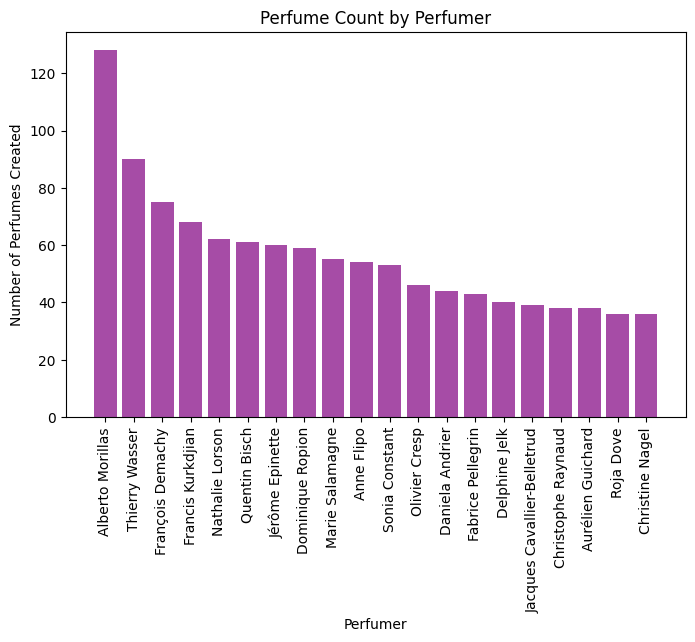

In [49]:
perfumer_counts = df['perfumer'].value_counts().to_dict()
# Get the top 4 perfumers
top_4_perfumers = dict(sorted(perfumer_counts.items(), key=lambda x: x[1], reverse=True)[:4])

print("Perfumer Counts:", perfumer_counts)
print("Top 4 Perfumers:", top_4_perfumers)

perfumers = list(perfumer_counts.keys())
counts = list(perfumer_counts.values())

top = 20
# Create the bar chart
plt.figure(figsize=(8, 5))
plt.bar(perfumers[:top], counts[:top], color='purple', alpha=0.7)

# Labels and title
plt.xlabel('Perfumer')
plt.ylabel('Number of Perfumes Created')
plt.xticks(rotation=90)

plt.title('Perfume Count by Perfumer')

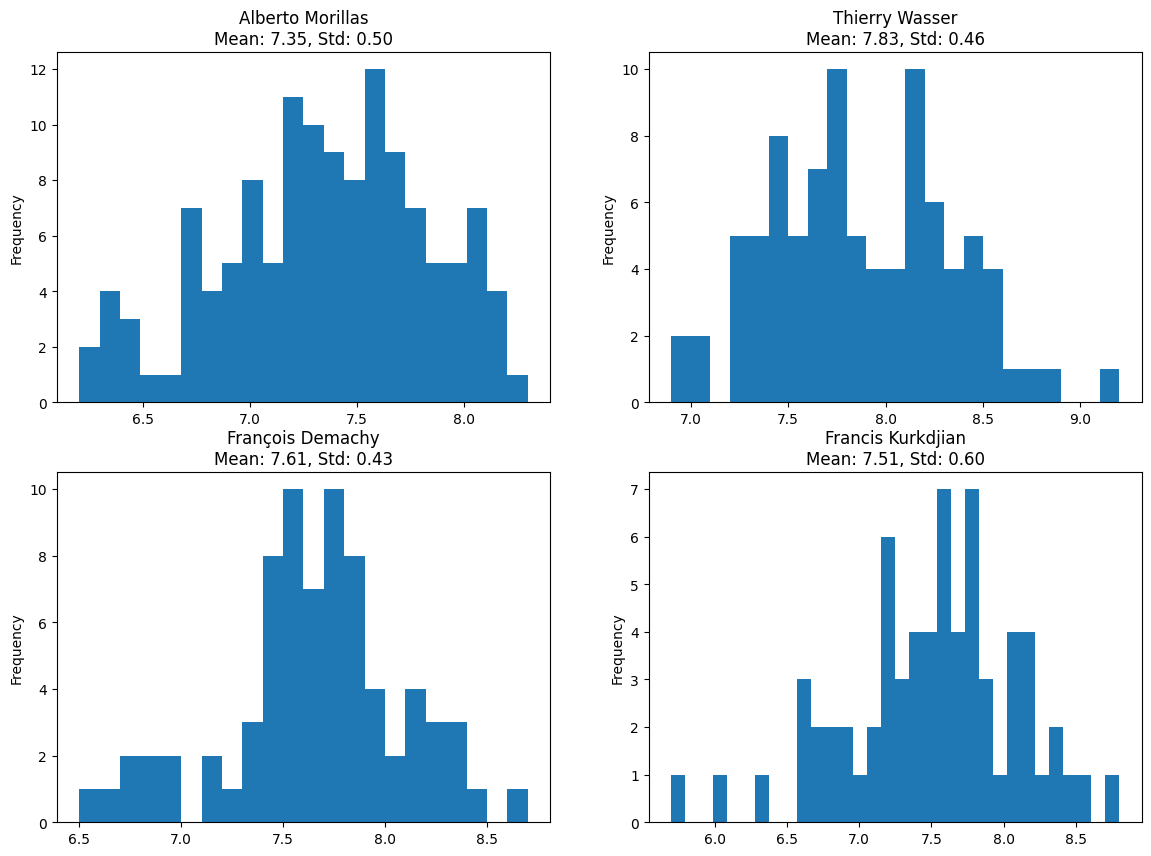

In [41]:
names = ['Alberto Morillas', 'Thierry Wasser', 'François Demachy', 'Francis Kurkdjian']
col_data = {
    names[0]: np.array(df.loc[df['perfumer'] == names[0], 'Duft.rating'].dropna()),
    names[1]: np.array(df.loc[df['perfumer'] == names[1], 'Duft.rating'].dropna()),
    names[2]: np.array(df.loc[df['perfumer'] == names[2], 'Duft.rating'].dropna()),
    names[3]: np.array(df.loc[df['perfumer'] == names[3], 'Duft.rating'].dropna())
}
scent_hist = np.array(df['Duft.rating'].dropna())
scent_mean = scent_hist.mean()
scent_std = scent_hist.std()

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Flatten the axes array to make indexing easier
axes = axes.flatten()

def get_bins(array):
    span = array.max() - array.min()
    bins = int(span*10) + 1
    return bins

# Plot the histograms in each of the 4 subplots
# Iterate over the dictionary and plot different entries
for i, (title, data) in enumerate(col_data.items()):
    ax = axes[i]
    ax.hist(data, bins=get_bins(data)) #have as many bins as there are different ratings
    ax.set_title(f'{title}\nMean: {data.mean():.2f}, Std: {data.std():.2f}')
    # ax.set_xlabel(f'rating')
    ax.set_ylabel('Frequency')
# Adjust layout for better

# Show the plots
plt.show()

#### Now take a look at the scent types

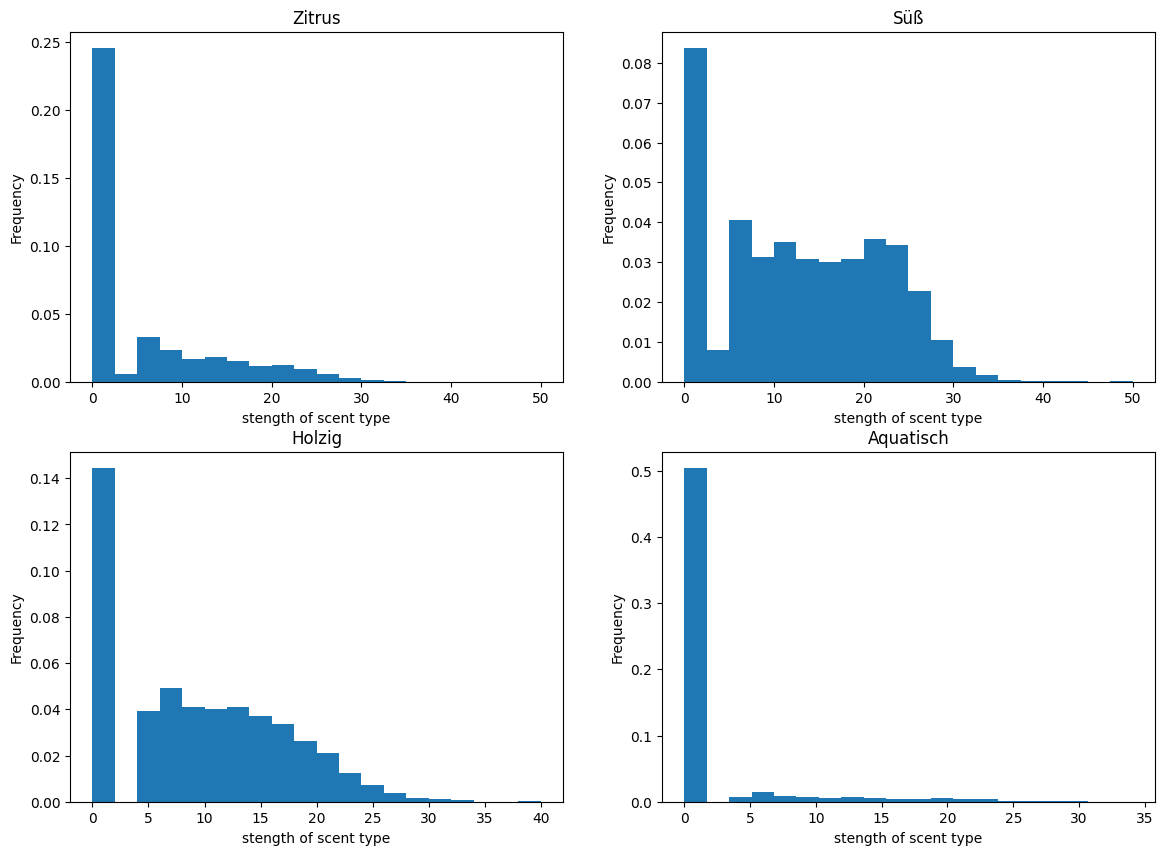

In [92]:
scent_type_names = ['Zitrus', 'Süß', 'Holzig', 'Aquatisch']

col_data = {
    scent_type_names[0]: df[scent_type_names[0]],
    scent_type_names[1]: df[scent_type_names[1]],
    scent_type_names[2]: df[scent_type_names[2]],
    scent_type_names[3]: df[scent_type_names[3]]
}

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

def get_bins(array):
    span = array.max() - array.min()
    bins = int(span*10) + 1
    return bins

for i, (title, data) in enumerate(col_data.items()):
    ax = axes[i]
    # ax.hist(data, bins=get_bins(data)) #have as many bins as there are different ratings
    ax.hist(data, bins=20, density=True) #have as many bins as there are different ratings
    ax.set_title(f'{title}')
    ax.set_xlabel(f'stength of scent type')
    ax.set_ylabel('Frequency')

# Show the plots
plt.show()

### Now we can think about how to choose the right features and what to analyize

In [37]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()

df['base_notes'] = df['base_notes'].apply(lambda x: x if isinstance(x, list) else [])
df['middle_notes'] = df['middle_notes'].apply(lambda x: x if isinstance(x, list) else [])
df['top_notes'] = df['top_notes'].apply(lambda x: x if isinstance(x, list) else [])
df['all_notes'] = df['all_notes'].apply(lambda x: x if isinstance(x, list) else [])

# Apply MultiLabelBinarizer to each column and create new DataFrames
base_encoded = pd.DataFrame(mlb.fit_transform(df['base_notes']), columns=mlb.classes_, index=df.index)
middle_encoded = pd.DataFrame(mlb.fit_transform(df['middle_notes']), columns=mlb.classes_, index=df.index)
top_encoded = pd.DataFrame(mlb.fit_transform(df['top_notes']), columns=mlb.classes_, index=df.index)
all_encoded = pd.DataFrame(mlb.fit_transform(df['all_notes']), columns=mlb.classes_, index=df.index)

# Merge with the original DataFrame
df_encoded = pd.concat([df, base_encoded, middle_encoded, top_encoded, all_encoded], axis=1)

In [45]:
base_encoded = pd.DataFrame(
    mlb.fit_transform(df['base_notes']), 
    columns=[f'base_{col}' for col in mlb.classes_], 
    index=df.index
)

middle_encoded = pd.DataFrame(
    mlb.fit_transform(df['middle_notes']), 
    columns=[f'middle_{col}' for col in mlb.classes_], 
    index=df.index
)

top_encoded = pd.DataFrame(
    mlb.fit_transform(df['top_notes']), 
    columns=[f'top_{col}' for col in mlb.classes_], 
    index=df.index
)

# Merge everything into a single DataFrame
df_encoded = pd.concat([df, base_encoded, middle_encoded, top_encoded], axis=1)

TypeError: 'NoneType' object is not iterable

In [40]:
df_encoded['Bergamotte']==1

,Bergamotte,Bergamotte,Bergamotte,Bergamotte
0,False,False,True,False
1,False,False,True,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
3989,False,False,False,False
3990,False,False,False,False
3991,False,False,False,False
3992,False,False,False,False
